/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:48:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


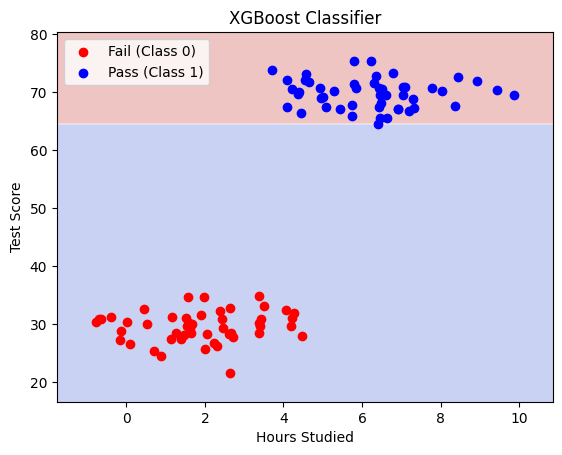

Feature Importances: [0. 1.]


In [13]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Step 2: Create dataset
np.random.seed(42)
# Class 0: Fail
X0 = np.random.multivariate_normal([2, 30], [[2, 0.5], [0.5, 10]], 50)
# Class 1: Pass
X1 = np.random.multivariate_normal([6, 70], [[2, -0.5], [-0.5, 8]], 50)

X = np.vstack((X0, X1))
y = np.array([0]*50 + [1]*50)

# Step 3: Train XGBoost Classifier
xgb_clf = XGBClassifier(
    n_estimators=100,     # number of trees
    learning_rate=0.1,    # step size shrinkage
    max_depth=3,          # depth of each tree
    reg_lambda=1.0,       # L2 regularization
    reg_alpha=0.0,        # L1 regularization
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_clf.fit(X, y)

# Step 4: Predict decision regions
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-5, X[:,1].max()+5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = xgb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X0[:,0], X0[:,1], color="red", label="Fail (Class 0)")
plt.scatter(X1[:,0], X1[:,1], color="blue", label="Pass (Class 1)")

plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("XGBoost Classifier")
plt.legend()
plt.show()

# Step 6: Feature importance
print("Feature Importances:", xgb_clf.feature_importances_)
